<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Fish_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Colab Notebooks/Kaggle"

In [3]:
!kaggle datasets download -d aungpyaeap/fish-market

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 2.17MB/s]


In [5]:
!unzip '/content/fish-market.zip' && rm '/content/fish-market.zip'

Archive:  /content/fish-market.zip
replace Fish.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Fish.csv                


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/Fish.csv')
data.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
data.shape

(159, 7)

In [12]:
np.around(data.describe(),2)

,Weight,Length1,Length2,Length3,Height,Width
count,159.00,159.00,159.00,159.00,159.00,159.00
mean,398.33,26.25,28.42,31.23,8.97,4.42
std,357.98,10.00,10.72,11.61,4.29,1.69
min,0.00,7.50,8.40,8.80,1.73,1.05
25%,120.00,19.05,21.00,23.15,5.94,3.39
50%,273.00,25.20,27.30,29.40,7.79,4.25
75%,650.00,32.70,35.50,39.65,12.37,5.58
max,1650.00,59.00,63.40,68.00,18.96,8.14


In [13]:
data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish = data.groupby(['Species'])['Weight'].count()

Text(0.5, 1.0, 'Distribution of species Fish')

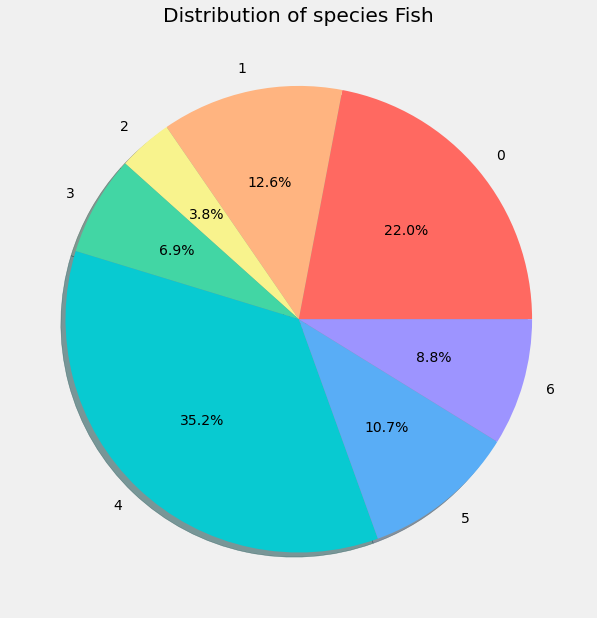

In [27]:
colors = ['#ff6961','#ffb480','#f8f38d','#42d6a4','#08cad1','#59adf6','#9d94ff','#c780e8']
plt.figure(figsize=(10,10))
plt.pie(fish.values,labels=fish.index, autopct='%.1f%%', shadow=True, colors=colors)
plt.title("Distribution of Fish species")

Text(0, 0.5, 'Quantity')

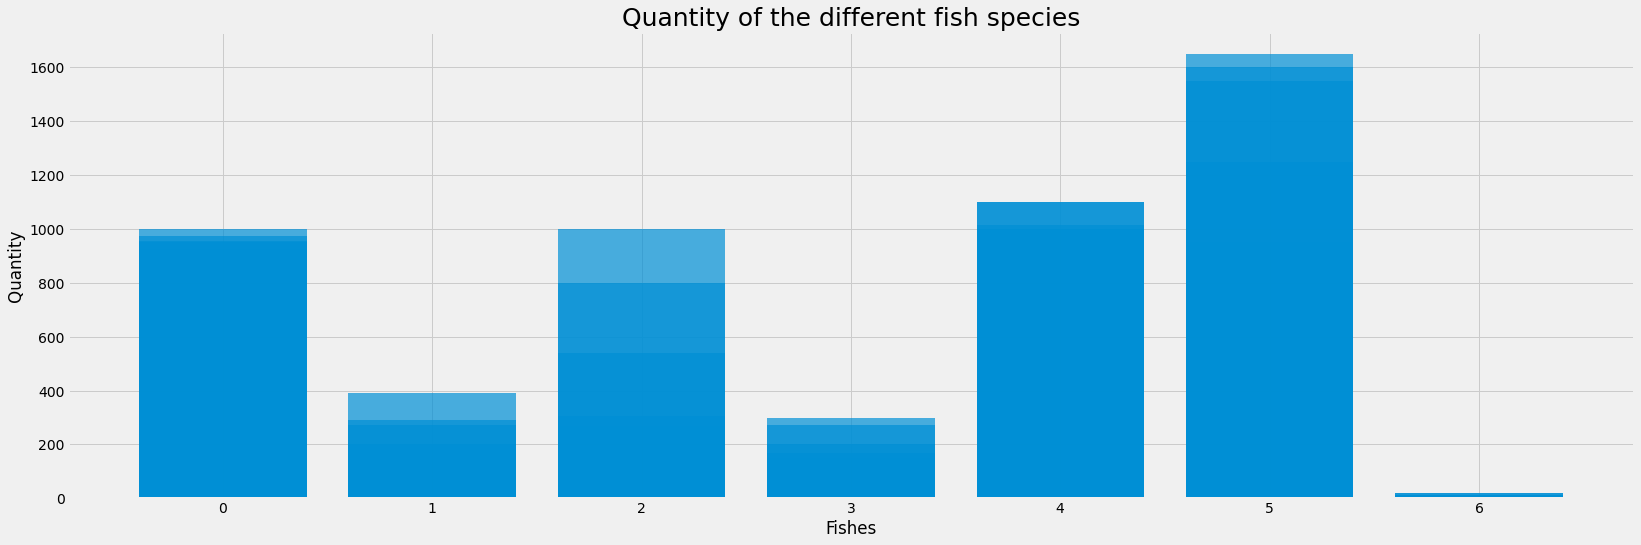

In [29]:
plt.figure(figsize=(25,8))
plt.bar(data['Species'], height=data['Weight'], alpha=0.7)
plt.title("Quantity of the different fish species", fontsize=25)
plt.xlabel("Fishes")
plt.ylabel("Quantity")


In [14]:
data['Species'] = data['Species'].map({'Bream':0, 'Roach':1, 'Whitefish':2, 'Parkki':3, 'Perch':4, 'Pike':5, 'Smelt':6})

Text(0.5, 1.0, 'Correlation between variable to find fish specie')

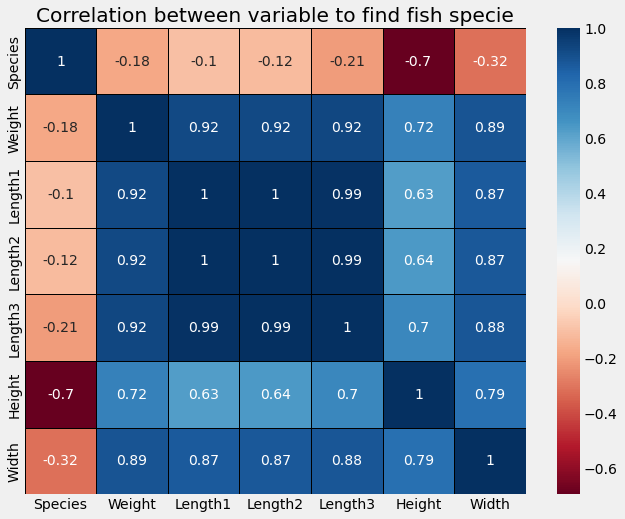

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), linewidths=1, linecolor='black', annot=True, cmap='RdBu')
plt.title("Correlation between variable to find fish specie")